<a href="https://colab.research.google.com/github/yonghaoharry/CZ4041_Machine_Learning_Project/blob/main/Feature_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
output_pt = "/content/drive/MyDrive/4041ML/output"

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv(output_pt + "/train.csv")
test_df = pd.read_csv(output_pt + "/test.csv")

In [5]:
test_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,1231.10,69,217,222,253,143,63,12,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,988.64,4,20,20,18,5,3,0,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,1250.00,0,0,0,3,0,0,0,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,1105.26,2,5,4,7,2,1,0,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,1030.00,5,10,21,10,8,1,0,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458


In [6]:
train_df.head(10)

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,1231.10,69,217,222,253,143,63,12,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,988.64,4,20,20,18,5,3,0,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,1250.00,0,0,0,3,0,0,0,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,1105.26,2,5,4,7,2,1,0,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,1030.00,5,10,21,10,8,1,0,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458
5,8186,8189,518,63.0,16.0,17.0,17.0,4.0,2013.0,2.0,1.0,1.0,1,72,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,540.0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,...,1030.00,0,1,2,1,1,0,0,0,2,0,0,1,0,4.46,6.54,1,26950,4,44437,16,662.50,1156.25,909.38,0,2,9,4,1,0,0,2,3,0,0,6,1,5903808.0,37.534162,55.866226
6,8255,8258,520,74.0,46.0,12.0,24.0,1.0,2004.0,3.0,9.0,3.0,0,39,3.879802e+06,81980,0.157332,0.232205,4926,2200.0,4,4860,6476.0,4,1,80.0,0,0,4,2,0,0,3,1,0,0,0,0,0,0,...,791.22,7,27,28,15,4,0,0,6,8,0,0,30,4,14.59,12.31,30,651686,44,3765370,165,650.34,1100.00,875.17,20,51,48,32,12,2,0,14,23,1,3,73,4,12100000.0,37.707386,55.623091
7,8282,8285,522,51.0,30.0,7.0,17.0,1.0,2003.0,2.0,9.0,3.0,0,124,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,...,956.25,2,1,3,4,0,0,0,0,2,0,1,5,2,31.56,13.57,11,385012,15,46

## NULL Count *

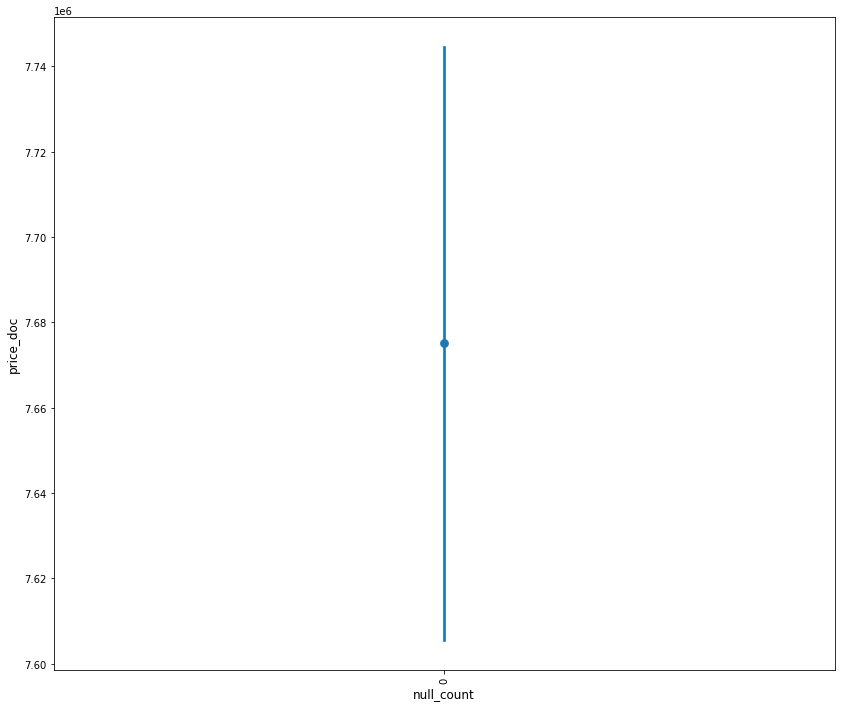

In [28]:
# NULL transfered to -99, for further test
train_df["null_count"] = train_df.isnull().sum(axis=1)
test_df["null_count"] = test_df.isnull().sum(axis=1)

plt.figure(figsize=(14,12))
sns.pointplot(x='null_count', y='price_doc', data=train_df)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('null_count', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
# test_df = test_df.drop(['null_count'], axis=1)
# train_df = train_df.drop(['null_count'], axis=1)

## Timestamp +6

In [37]:
# year and month #
train_df["yearmonth"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.month
test_df["yearmonth"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.month

# year and week #
train_df["yearweek"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.weekofyear
test_df["yearweek"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.weekofyear

# year #
train_df["year"] = train_df["timestamp"].dt.year
test_df["year"] = test_df["timestamp"].dt.year

# month of year #
train_df["month_of_year"] = train_df["timestamp"].dt.month
test_df["month_of_year"] = test_df["timestamp"].dt.month

# week of year #
train_df["week_of_year"] = train_df["timestamp"].dt.weekofyear
test_df["week_of_year"] = test_df["timestamp"].dt.weekofyear

# day of week #
train_df["day_of_week"] = train_df["timestamp"].dt.weekday
test_df["day_of_week"] = test_df["timestamp"].dt.weekday

AttributeError: ignored

## Area ratio +4

In [7]:
# area of the property is the top variables -> might helpful create some ratio variables around it (3 features added)

# ratio of living area to full area
train_df["ratio_life_full"] = train_df["life_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_life_full"] = test_df["life_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_life_full"].iloc[train_df["ratio_life_full"]<0] = 0
train_df["ratio_life_full"].iloc[train_df["ratio_life_full"]>1] = 1
test_df["ratio_life_full"].iloc[test_df["ratio_life_full"]<0] = 0
test_df["ratio_life_full"].iloc[test_df["ratio_life_full"]>1] = 1

# ratio of kitchen area to living area #
train_df["ratio_kitch_life"] = train_df["kitch_sq"] / np.maximum(train_df["life_sq"].astype("float"),1)
test_df["ratio_kitch_life"] = test_df["kitch_sq"] / np.maximum(test_df["life_sq"].astype("float"),1)
train_df["ratio_kitch_life"].iloc[train_df["ratio_kitch_life"]<0] = 0
train_df["ratio_kitch_life"].iloc[train_df["ratio_kitch_life"]>1] = 1
test_df["ratio_kitch_life"].iloc[test_df["ratio_kitch_life"]<0] = 0
test_df["ratio_kitch_life"].iloc[test_df["ratio_kitch_life"]>1] = 1

# ratio of kitchen area to full area #
train_df["ratio_kitch_full"] = train_df["kitch_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_kitch_full"] = test_df["kitch_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_kitch_full"].iloc[train_df["ratio_kitch_full"]<0] = 0
train_df["ratio_kitch_full"].iloc[train_df["ratio_kitch_full"]>1] = 1
test_df["ratio_kitch_full"].iloc[test_df["ratio_kitch_full"]<0] = 0
test_df["ratio_kitch_full"].iloc[test_df["ratio_kitch_full"]>1] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [8]:
# the difference between full area and living area

train_df["full_live_diff"] = train_df["full_sq"] - train_df["life_sq"]
test_df["full_live_diff"] = test_df["full_sq"] - test_df["life_sq"]

In [9]:
train_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,253,143,63,12,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,18,5,3,0,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,7,2,1,0,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,10,8,1,0,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0


In [10]:
test_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,253,143,63,12,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,18,5,3,0,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,7,2,1,0,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,10,8,1,0,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0


## Floor Proportion & Top Count +2

In [11]:
# The next important variables from EDA are floor and max_floor -> create two features: floor num/total num of floors; num of floor from the top

# floor of the house to the total number of floors in the apartment
train_df["ratio_floor_max_floor"] = train_df["floor"] / train_df["max_floor"].astype("float")
test_df["ratio_floor_max_floor"] = test_df["floor"] / test_df["max_floor"].astype("float")

# num of floor from top #
train_df["floor_from_top"] = train_df["max_floor"] - train_df["floor"]
test_df["floor_from_top"] = test_df["max_floor"] - test_df["floor"]

In [12]:
train_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,63,12,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0,0.400000,3.0
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,3,0,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0,0.625000,6.0
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0,0.117647,15.0
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,1,0,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0,0.666667,3.0
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,1,0,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0,0.937500,1.0


In [13]:
test_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,63,12,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0,0.400000,3.0
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,3,0,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0,0.625000,6.0
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0,0.117647,15.0
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,1,0,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0,0.666667,3.0
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,1,0,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0,0.937500,1.0


## Age of building +1

In [51]:
# Age of building, listing yr - built yr

train_df["age_of_building"] = train_df["year"] - train_df["build_year"]
test_df["age_of_building"] = test_df["year"] - test_df["build_year"]

KeyError: ignored

## School +2

In [14]:
# number of children goiong to preschool / seats available in preschool

train_df["ratio_preschool"] = train_df["children_preschool"] / train_df["preschool_quota"].astype("float")
test_df["ratio_preschool"] = test_df["children_preschool"] / test_df["preschool_quota"].astype("float")

train_df["ratio_school"] = train_df["children_school"] / train_df["school_quota"].astype("float")
test_df["ratio_school"] = test_df["children_school"] / test_df["school_quota"].astype("float")

In [15]:
train_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,ratio_preschool,ratio_school
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0,0.400000,3.0,38.630303,0.807326
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0,0.625000,6.0,1.796892,0.633361
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0,0.117647,15.0,-4.939394,-4.737374
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0,0.666667,3.0,1.410561,0.626944
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0,0.937500,1.0,2.564389,0.793026


In [16]:
test_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,ratio_preschool,ratio_school
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0,0.400000,3.0,38.630303,0.807326
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,3,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0,0.625000,6.0,1.796892,0.633361
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0,0.117647,15.0,-4.939394,-4.737374
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,1,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0,0.666667,3.0,1.410561,0.626944
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,2,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0,0.937500,1.0,2.564389,0.793026


## Apartment +1

In [17]:
# district name + dist to metro by car as str type

train_df['apartment_name']=train_df['sub_area'].astype(str) + train_df['metro_km_avto'].astype(str)
test_df['apartment_name']=test_df['sub_area'].astype(str) + test_df['metro_km_avto'].astype(str)

In [18]:
train_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,ratio_preschool,ratio_school,apartment_name
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0,0.400000,3.0,38.630303,0.807326,291.291875646
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0,0.625000,6.0,1.796892,0.633361,551.503697835
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0,0.117647,15.0,-4.939394,-4.737374,1052.436882294
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0,0.666667,3.0,1.410561,0.626944,1150.827412852
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0,0.937500,1.0,2.564389,0.793026,244.400699329


In [19]:
test_df.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,...,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,ratio_preschool,ratio_school,apartment_name
0,8056,8059,512,20.0,16.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,0,29,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,1,2,5,87,0,0,0,1,0,0,...,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000.0,37.504051,55.525648,0.800000,0.750000,0.600000,4.0,0.400000,3.0,38.630303,0.807326,291.291875646
1,8135,8138,516,53.0,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,0,55,5.646405e+06,79576,0.258663,0.101872,4857,2703.0,5,4583,7236.0,5,0,-99.0,3,0,4,3,0,0,3,3,0,0,0,1,0,0,...,4,0,0,24,2,15.44,18.47,25,766701,48,2311301,142,736.15,1226.92,981.54,12,34,43,39,10,4,0,11,21,1,0,46,5,9000000.0,37.786234,55.792259,0.566038,0.266667,0.150943,23.0,0.625000,6.0,1.796892,0.633361,551.503697835
2,8153,8156,517,77.0,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,1,105,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7011550.0,37.425744,55.721025,0.532468,0.292683,0.155844,36.0,0.117647,15.0,-4.939394,-4.737374,1052.436882294
3,8154,8157,517,45.0,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,0,115,8.889467e+06,90114,0.579645,0.000000,5102,3617.0,6,4798,7653.0,6,0,30.0,2,0,6,1,0,0,8,0,0,0,0,0,0,0,...,3,0,0,14,2,28.73,8.05,3,81947,25,376066,31,782.76,1258.62,1020.69,2,9,5,12,2,1,0,3,8,1,0,19,3,7100000.0,37.789424,55.757179,0.600000,0.222222,0.133333,18.0,0.666667,3.0,1.410561,0.626944,1150.827412852
4,8175,8178,518,38.0,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,-99.0,0,24,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,0,0,6,6,0,0,0,1,0,0,...,5,0,2,32,1,20.98,11.12,83,3903973,34,1921805,285,874.90,1463.88,1169.39,22,62,82,53,49,16,1,11,25,1,7,95,4,6450000.0,37.926360,55.703458,0.526316,0.400000,0.210526,18.0,0.937500,1.0,2.564389,0.793026,244.400699329


## Remove unneeded features for model building

In [ ]:
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)
test_X = test_df.drop(["id", "timestamp"] , axis=1)

## Log price ?

In [ ]:
train_y = np.log1p(train_df.price_doc.values)